In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
 cd /content/gdrive/My Drive/CNN

/content/gdrive/My Drive/자료분석특론/프로젝트


# CNN4

- 1,2,3,4 조건 는 마찬가지
- 대비 향상 및 자른 데이터 이용

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range=0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)
validate_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_dir = '/content/gdrive/My Drive/CNN/COVID_CT_NEW3/train'
vali_dir = '/content/gdrive/My Drive/CNN/COVID_CT_NEW3/validate'
test_dir = '/content/gdrive/My Drive/CNN/COVID_CT_NEW3/test'

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 30,
    class_mode = 'binary',
    color_mode='grayscale'
)

Found 527 images belonging to 2 classes.


In [ ]:
validation_generator = validate_datagen.flow_from_directory(
    vali_dir,
    target_size = (150, 150),
    batch_size = 30,
    class_mode = 'binary',
    color_mode='grayscale'
)

Found 110 images belonging to 2 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    batch_size = 30,
    class_mode = 'binary',
    color_mode='grayscale'
)

Found 414 images belonging to 2 classes.


In [ ]:
IMAGE_ROWS = 150
IMAGE_COLS = 150
BATCH_SIZE = 30
IMAGE_SHAPE = (IMAGE_ROWS,IMAGE_COLS,1)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models

model4 = models.Sequential()
model4.add(layers.Conv2D(6, (3,3), activation='relu', input_shape=IMAGE_SHAPE))
model4.add(layers.MaxPooling2D((2,2)))
model4.add(layers.Dropout(0.8))
# model4.add(layers.Conv2D(64, (3,3), activation='relu'))
# model4.add(layers.MaxPooling2D((2,2)))
model4.add(layers.Flatten())
# model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(2, activation='relu'))
model4.add(layers.Dense(1, activation='sigmoid'))

model4.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_93 (Conv2D)           (None, 148, 148, 6)       60        
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 74, 74, 6)         0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 74, 74, 6)         0         
_________________________________________________________________
flatten_52 (Flatten)         (None, 32856)             0         
_________________________________________________________________
dense_29 (Dense)             (None, 2)                 65714     
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 3         
Total params: 65,777
Trainable params: 65,777
Non-trainable params: 0
__________________________________________________

In [ ]:
from tensorflow.keras import optimizers

model4.compile(optimizer=optimizers.Adam(learning_rate=1e-4), # 'rmsprop',
               loss='binary_crossentropy',
               metrics=['acc'])

In [ ]:
history4 = model4.fit_generator(train_generator, steps_per_epoch=15, epochs=10, validation_data = validation_generator, validation_steps = 1) # , validation_data = validation_generator, validation_steps = 10

Epoch 1/10
15/15 [==============================] - 5s 361ms/step - loss: 0.6848 - acc: 0.5355 - val_loss: 0.6418 - val_acc: 0.5333
Epoch 2/10
15/15 [==============================] - 4s 289ms/step - loss: 0.6879 - acc: 0.5240 - val_loss: 0.6803 - val_acc: 0.5333
Epoch 3/10
15/15 [==============================] - 4s 298ms/step - loss: 0.6138 - acc: 0.5956 - val_loss: 0.5670 - val_acc: 0.5333
Epoch 4/10
15/15 [==============================] - 4s 294ms/step - loss: 0.5759 - acc: 0.6819 - val_loss: 0.5312 - val_acc: 0.8000
Epoch 5/10
15/15 [==============================] - 4s 293ms/step - loss: 0.5209 - acc: 0.7052 - val_loss: 0.4973 - val_acc: 0.7000
Epoch 6/10
15/15 [==============================] - 4s 297ms/step - loss: 0.5198 - acc: 0.7600 - val_loss: 0.4718 - val_acc: 0.7667
Epoch 7/10
15/15 [==============================] - 5s 300ms/step - loss: 0.4852 - acc: 0.7889 - val_loss: 0.4592 - val_acc: 0.9000
Epoch 8/10
15/15 [==============================] - 4s 295ms/step - loss: 0.

In [ ]:
tr_score = model4.evaluate_generator(train_generator)
print('Train Loss : {:.4f}'.format(tr_score[0]))
print('Train Accuracy : {:.4f}'.format(tr_score[1]))

Train Loss : 0.4205
Train Accuracy : 0.9981


In [ ]:
te_score = model4.evaluate(test_generator)
print('Test Loss : {:.4f}'.format(te_score[0]))
print('Test Accuracy : {:.4f}'.format(te_score[1]))

14/14 [==============================] - 3s 203ms/step - loss: 0.4128 - acc: 0.9928
Test Loss : 0.4128
Test Accuracy : 0.9928


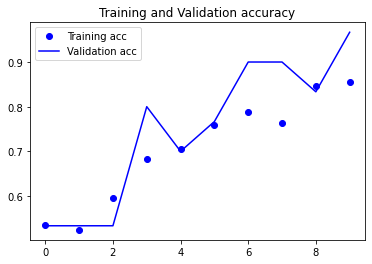

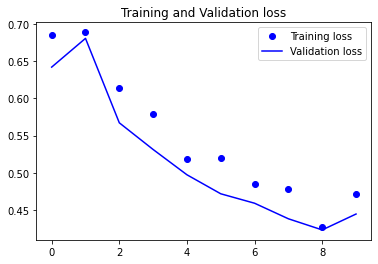

In [ ]:
import matplotlib.pyplot as plt
acc = history4.history['acc']
val_acc = history4.history['val_acc']
loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

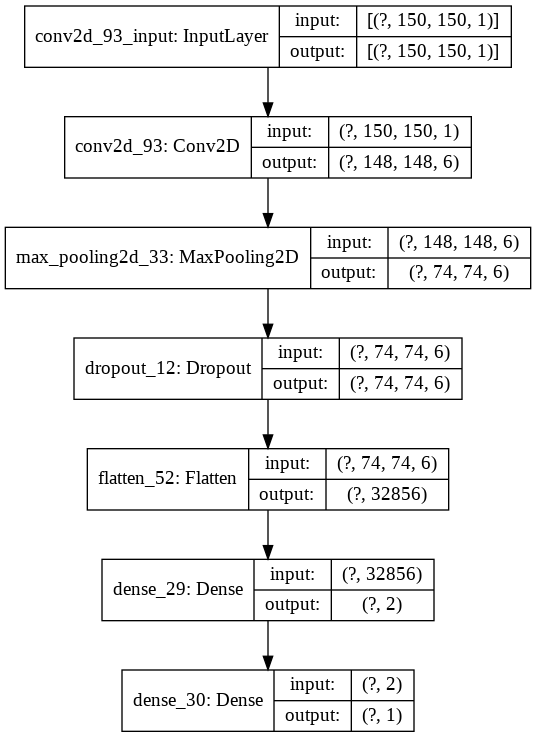

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model4, to_file='CNN4.png', show_shapes=True)

굉장히 적은 파라미터와 빠른 속도

# CNN5 - Inception-v3

- X-ray classification에서도 사용되는 모델, 흑백 이미지 분류에 많이 사용, GoogleNet의 기반이 되는 모델


In [ ]:
IMAGE_ROWS = 150
IMAGE_COLS = 150
IMAGE_SHAPE = (IMAGE_ROWS,IMAGE_COLS,1)

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, concatenate, Input, Dense, Flatten
from tensorflow.keras import models

inputs = Input(IMAGE_SHAPE)
conv1x1 = Conv2D(1, kernel_size=(1,1), padding='same', activation='relu')(inputs)
conv3x3 = Conv2D(2, kernel_size=(3,3), padding='same', activation='relu')(inputs)
conv5x5 = Conv2D(1, kernel_size=(5,5), padding='same', activation='relu')(inputs)
pooling = MaxPooling2D((3,3), strides=(1,1), padding='same')(inputs)

conv1x1_out = Flatten()(conv1x1)
conv3x3_out = Flatten()(conv3x3)
conv5x5_out = Flatten()(conv5x5)
pooling_out = Flatten()(pooling)

concat = concatenate([conv1x1_out, conv3x3_out, conv5x5_out, pooling_out])
output_layer = Dense(1, activation='sigmoid')(concat) 

model5 = models.Model(inputs, output_layer)

In [ ]:
model5.summary()

Model: "model_21"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_44 (InputLayer)           [(None, 150, 150, 1) 0                                            
__________________________________________________________________________________________________
conv2d_161 (Conv2D)             (None, 150, 150, 1)  2           input_44[0][0]                   
__________________________________________________________________________________________________
conv2d_162 (Conv2D)             (None, 150, 150, 2)  20          input_44[0][0]                   
__________________________________________________________________________________________________
conv2d_163 (Conv2D)             (None, 150, 150, 1)  26          input_44[0][0]                   
___________________________________________________________________________________________

In [ ]:
from tensorflow.keras import optimizers

model5.compile(optimizer=optimizers.Adam(learning_rate=1e-4), # 'rmsprop',
               loss='binary_crossentropy',
               metrics=['acc'])

In [ ]:
history5 = model5.fit_generator(train_generator, steps_per_epoch=15, epochs=3, validation_data = validation_generator, validation_steps = 1)
# epoch 3번 이상은 거의 accuracy 1

Epoch 1/3
15/15 [==============================] - 9s 580ms/step - loss: 0.5179 - acc: 0.7963 - val_loss: 0.3980 - val_acc: 0.9000
Epoch 2/3
15/15 [==============================] - 7s 495ms/step - loss: 0.2833 - acc: 0.9336 - val_loss: 0.2637 - val_acc: 1.0000
Epoch 3/3
15/15 [==============================] - 7s 495ms/step - loss: 0.1790 - acc: 0.9954 - val_loss: 0.1876 - val_acc: 1.0000


In [ ]:
tr_score = model5.evaluate_generator(train_generator)
print('Train Loss : {:.4f}'.format(tr_score[0]))
print('Train Accuracy : {:.4f}'.format(tr_score[1]))

Train Loss : 0.1313
Train Accuracy : 1.0000


In [ ]:
te_score = model5.evaluate(test_generator)
print('Test Loss : {:.4f}'.format(te_score[0]))
print('Test Accuracy : {:.4f}'.format(te_score[1]))

14/14 [==============================] - 4s 297ms/step - loss: 0.1386 - acc: 1.0000
Test Loss : 0.1386
Test Accuracy : 1.0000


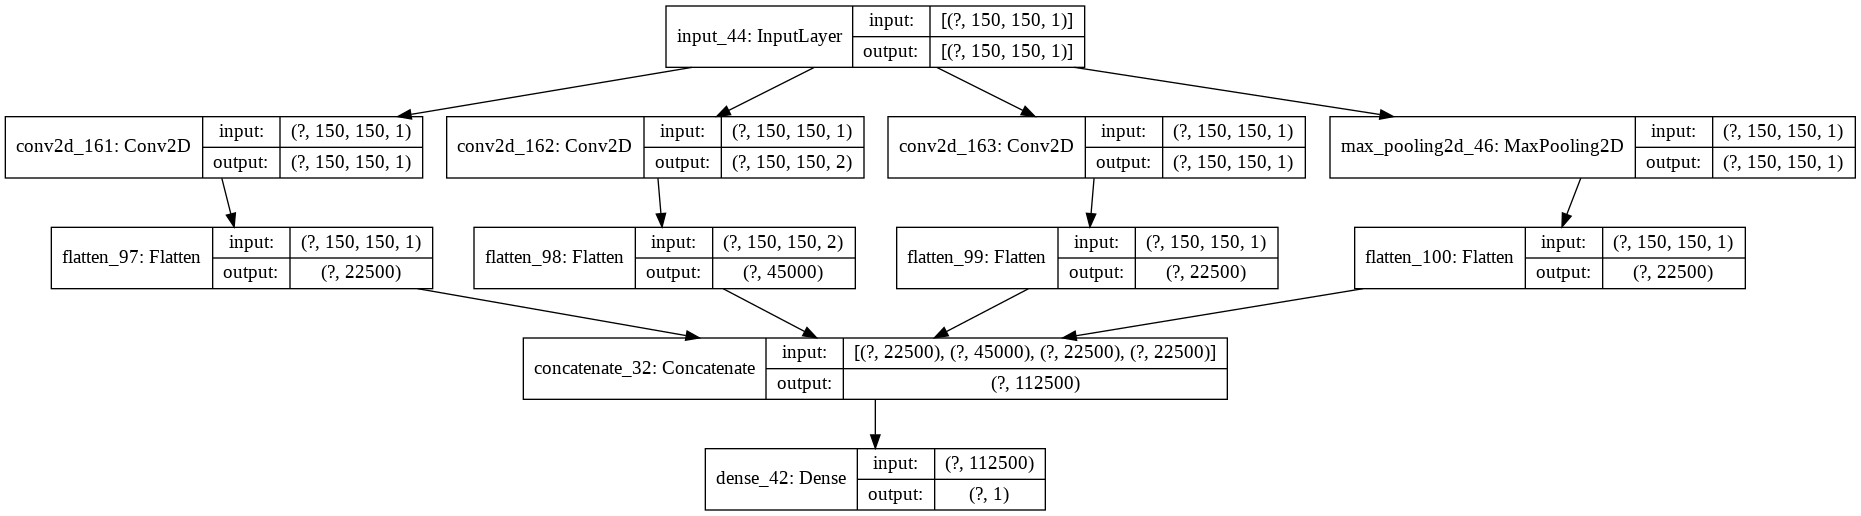

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model5, to_file='CNN5.png', show_shapes=True)

# CNN6 - Reduced Inception-v3

- Convolution1x1 레이어를 이용하여 dimension을 줄여, AlexNet보다 12배만큼 적은 파라미터로 훈련


In [ ]:
def inception_block_dim_reduce(input_layer, filter1, filter2, filter3, reduce1, reduce2, pool_proj, activation='relu', pull=False):
    conv1x1 = Conv2D(filter1, kernel_size=(1,1), padding='same', activation=activation)(input_layer)
    conv3x3_reduce = Conv2D(reduce1, kernel_size=(1,1), padding='same', activation=activation)(input_layer)
    conv3x3 = Conv2D(filter2, kernel_size=(3,3), padding='same', activation=activation)(conv3x3_reduce)
    conv5x5_reduce = Conv2D(reduce2, kernel_size=(1,1), padding='same', activation=activation)(input_layer)
    conv5x5 = Conv2D(filter3, kernel_size=(5,5), padding='same', activation=activation)(conv5x5_reduce)
    pooling = MaxPooling2D((3,3), strides=(1,1), padding='same')(input_layer)
    pool_proj = Conv2D(pool_proj, kernel_size=(1,1), padding='same', activation=activation)(pooling)
    output_layer = concatenate([conv1x1, conv3x3, conv5x5, pool_proj])
    
    # Googlenet exracts pool_proj in order to ensemble in three cases
    if pull == True:
        return output_layer, pool_proj
    
    return output_layer
    
shape = (224,224,3)

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, concatenate, Input, Dense, Flatten
from tensorflow.keras import models

inputs = Input(IMAGE_SHAPE)
conv1x1 = Conv2D(1, kernel_size=(7,7), padding='same', activation='relu')(inputs)
conv3x3_reduce = Conv2D(1, kernel_size=(1,1), padding='same', activation='relu')(inputs)
conv3x3 = Conv2D(1, kernel_size=(3,3), padding='same', activation='relu')(conv3x3_reduce)
conv5x5_reduce = Conv2D(1, kernel_size=(1,1), padding='same', activation='relu')(inputs)
conv5x5 = Conv2D(1, kernel_size=(5,5), padding='same', activation='relu')(conv5x5_reduce)
pooling = MaxPooling2D((4,4), strides=(1,1), padding='same')(inputs)
pool_proj = Conv2D(1, kernel_size=(1,1), padding='same', activation='relu')(pooling)

conv1x1_out = Flatten()(conv1x1)
conv3x3_out = Flatten()(conv3x3)
conv5x5_out = Flatten()(conv5x5)
pooling_out = Flatten()(pool_proj)

concat = concatenate([conv1x1_out, conv3x3_out, conv5x5_out, pooling_out])
output_layer = Dense(1, activation='sigmoid')(concat) 

model6 = models.Model(inputs, output_layer)

In [ ]:
model6.summary()

Model: "model_20"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_43 (InputLayer)           [(None, 150, 150, 1) 0                                            
__________________________________________________________________________________________________
conv2d_156 (Conv2D)             (None, 150, 150, 1)  2           input_43[0][0]                   
__________________________________________________________________________________________________
conv2d_158 (Conv2D)             (None, 150, 150, 1)  2           input_43[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_45 (MaxPooling2D) (None, 150, 150, 1)  0           input_43[0][0]                   
___________________________________________________________________________________________

In [ ]:
from tensorflow.keras import optimizers

model6.compile(optimizer=optimizers.Adam(learning_rate=1e-4), # 'rmsprop',
               loss='binary_crossentropy',
               metrics=['acc'])

In [ ]:
history6 = model6.fit_generator(train_generator, steps_per_epoch=15, epochs=3, validation_data = validation_generator, validation_steps = 1) # , validation_data = validation_generator, validation_steps = 10
# epoch 세 번으로도 충분함

Epoch 1/3
15/15 [==============================] - 15s 996ms/step - loss: 0.4916 - acc: 0.7506 - val_loss: 0.5030 - val_acc: 0.5667
Epoch 2/3
15/15 [==============================] - 14s 943ms/step - loss: 0.3216 - acc: 0.8556 - val_loss: 0.2551 - val_acc: 0.9667
Epoch 3/3
15/15 [==============================] - 14s 930ms/step - loss: 0.1673 - acc: 0.9886 - val_loss: 0.1641 - val_acc: 0.9667


In [ ]:
tr_score = model6.evaluate_generator(train_generator)
print('Train Loss : {:.4f}'.format(tr_score[0]))
print('Train Accuracy : {:.4f}'.format(tr_score[1]))

Train Loss : 0.1334
Train Accuracy : 0.9962


In [ ]:
te_score = model6.evaluate(test_generator)
print('Test Loss : {:.4f}'.format(te_score[0]))
print('Test Accuracy : {:.4f}'.format(te_score[1]))

14/14 [==============================] - 6s 440ms/step - loss: 0.1392 - acc: 0.9952
Test Loss : 0.1392
Test Accuracy : 0.9952


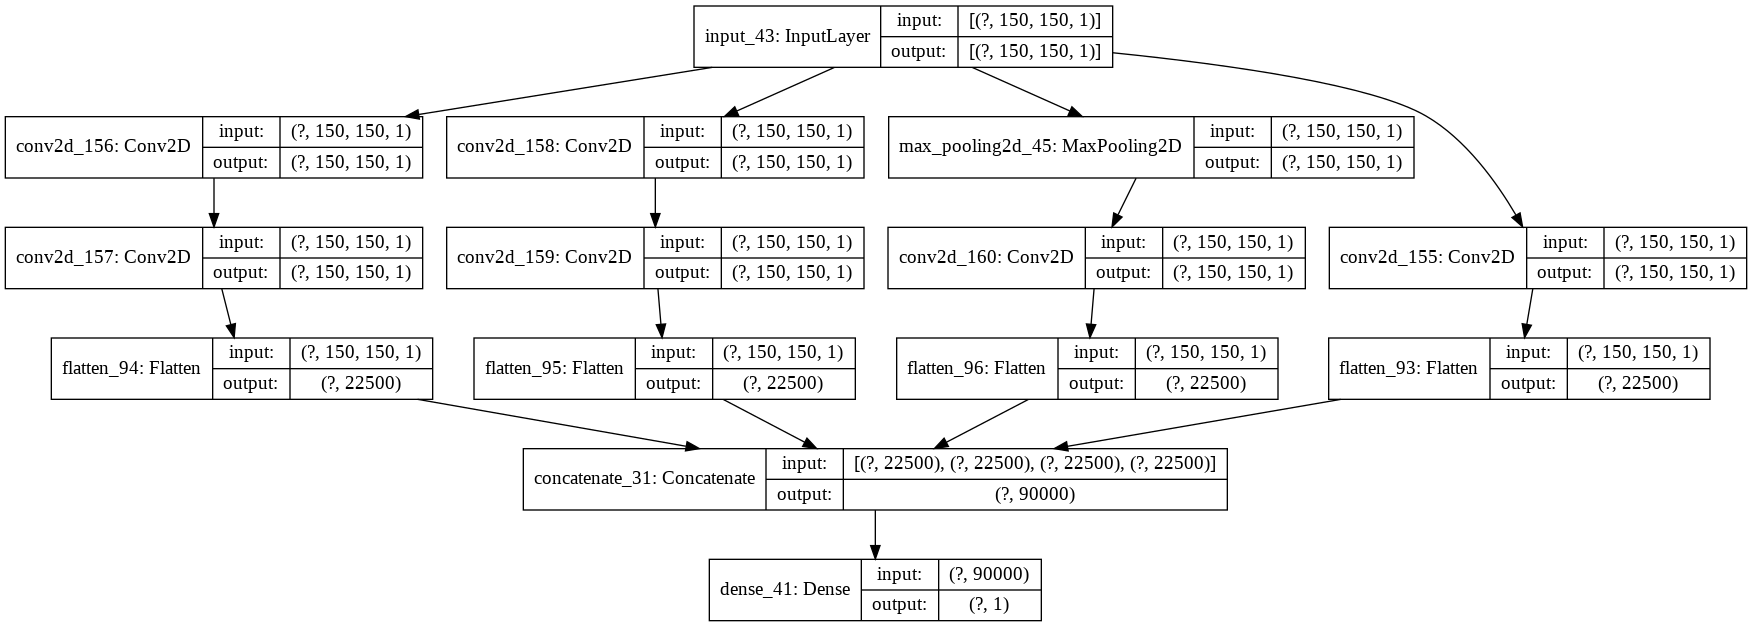

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model6, to_file='CNN6.png', show_shapes=True)